Importing necessary libraries

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mimg
%matplotlib inline

Show image

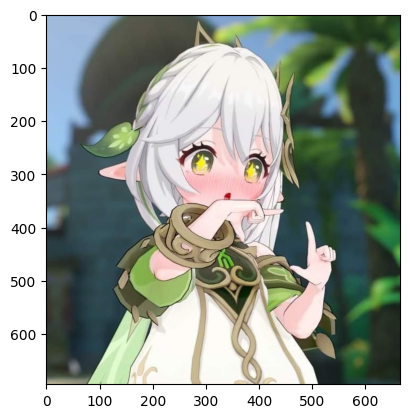

In [2]:
image = Image.open("test.jpg")

def display_image(image):
    plt.imshow(image)
    plt.show()

display_image(image)

Testing with OpenCV library (not in use)

In [3]:
import cv2
 
def read_image(image):
    # Convert the image from BGR to RGB
    image = cv2.imread("test.jpg")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Scaling the image so that the values are in the range of 0 to 1
    return image

read_image(image)


array([[[161, 187, 220],
        [161, 187, 220],
        [161, 187, 220],
        ...,
        [ 34,  64,  30],
        [ 34,  64,  30],
        [ 34,  64,  30]],

       [[161, 187, 220],
        [161, 187, 220],
        [161, 187, 220],
        ...,
        [ 34,  64,  30],
        [ 34,  64,  30],
        [ 34,  64,  30]],

       [[161, 187, 220],
        [161, 187, 220],
        [161, 187, 220],
        ...,
        [ 34,  64,  30],
        [ 34,  64,  30],
        [ 34,  64,  30]],

       ...,

       [[176, 174, 151],
        [176, 174, 151],
        [176, 174, 151],
        ...,
        [ 47,  59,  55],
        [ 46,  58,  54],
        [ 46,  58,  54]],

       [[179, 177, 154],
        [179, 177, 154],
        [179, 177, 154],
        ...,
        [ 49,  61,  57],
        [ 49,  61,  57],
        [ 49,  61,  57]],

       [[181, 179, 156],
        [181, 179, 156],
        [181, 179, 156],
        ...,
        [ 51,  63,  59],
        [ 50,  62,  58],
        [ 50,  62,  58]]

In [4]:
def preprocess_image(image):
    img_np = np.asarray(image)
    return img_np

preprocess_image(image)

array([[[161, 187, 220],
        [161, 187, 220],
        [161, 187, 220],
        ...,
        [ 34,  64,  30],
        [ 34,  64,  30],
        [ 34,  64,  30]],

       [[161, 187, 220],
        [161, 187, 220],
        [161, 187, 220],
        ...,
        [ 34,  64,  30],
        [ 34,  64,  30],
        [ 34,  64,  30]],

       [[161, 187, 220],
        [161, 187, 220],
        [161, 187, 220],
        ...,
        [ 34,  64,  30],
        [ 34,  64,  30],
        [ 34,  64,  30]],

       ...,

       [[176, 174, 151],
        [176, 174, 151],
        [176, 174, 151],
        ...,
        [ 47,  59,  55],
        [ 46,  58,  54],
        [ 46,  58,  54]],

       [[179, 177, 154],
        [179, 177, 154],
        [179, 177, 154],
        ...,
        [ 49,  61,  57],
        [ 49,  61,  57],
        [ 49,  61,  57]],

       [[181, 179, 156],
        [181, 179, 156],
        [181, 179, 156],
        ...,
        [ 51,  63,  59],
        [ 50,  62,  58],
        [ 50,  62,  58]]

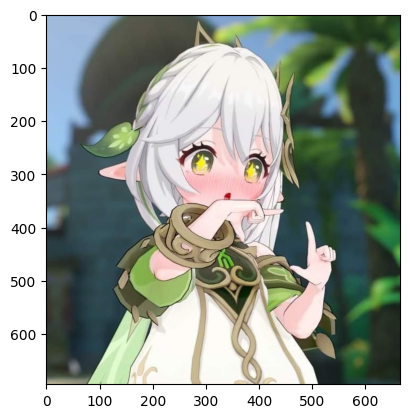

In [5]:
plt.imshow(np.array(image))

In [6]:
img_np = np.array(image)
img_np = np.float32(img_np)

img_np

array([[[161., 187., 220.],
        [161., 187., 220.],
        [161., 187., 220.],
        ...,
        [ 34.,  64.,  30.],
        [ 34.,  64.,  30.],
        [ 34.,  64.,  30.]],

       [[161., 187., 220.],
        [161., 187., 220.],
        [161., 187., 220.],
        ...,
        [ 34.,  64.,  30.],
        [ 34.,  64.,  30.],
        [ 34.,  64.,  30.]],

       [[161., 187., 220.],
        [161., 187., 220.],
        [161., 187., 220.],
        ...,
        [ 34.,  64.,  30.],
        [ 34.,  64.,  30.],
        [ 34.,  64.,  30.]],

       ...,

       [[176., 174., 151.],
        [176., 174., 151.],
        [176., 174., 151.],
        ...,
        [ 47.,  59.,  55.],
        [ 46.,  58.,  54.],
        [ 46.,  58.,  54.]],

       [[179., 177., 154.],
        [179., 177., 154.],
        [179., 177., 154.],
        ...,
        [ 49.,  61.,  57.],
        [ 49.,  61.,  57.],
        [ 49.,  61.,  57.]],

       [[181., 179., 156.],
        [181., 179., 156.],
        [181., 1

In [7]:
img_np.shape

(695, 666, 3)

In [8]:
#pixels = image.reshape(img.shape[0] * img_np.shape[1],img_np.shape[2])
#pixels.shape

# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = np.array(image).reshape((-1,3))
 
# Convert to float type
pixel_vals = np.float32(pixel_vals)

pixel_vals

array([[161., 187., 220.],
       [161., 187., 220.],
       [161., 187., 220.],
       ...,
       [ 51.,  63.,  59.],
       [ 50.,  62.,  58.],
       [ 50.,  62.,  58.]], dtype=float32)

Initializing means

In [9]:
def initialize_means(img_np, clusters):
    # reshaping it or flattening it into a 2d matrix
    pixels = img_np.reshape((-1,3))
    pixels = np.float32(pixels)
    m, n =  pixels.shape
 
    # Mean: array of assumed means or centroids.
    means = np.zeros((clusters, n))
 
    # Randomized initialization of means.
    for i in range(0,clusters):
        rand_indices = np.random.choice(m, size=10, replace=False)
        means[i] = np.mean(pixels[rand_indices], axis=0)
    return pixels, means
    

Calculate Euclidean distance

In [10]:
def calc_distance(x1, y1, x2, y2):
    distance = np.square(x1 - x2) + np.square(y1 - y2)
    distance = np.sqrt(distance)
    return distance

Implementing K-means

In [18]:
def k_means(pixels, means, clusters):
    iter = 10  # The number of iterations
    m, n = pixels.shape
 
    # Index values that correspond to the cluster to which each pixel belongs to.
    index = np.zeros(m)
 
    # K-means 
    while iter > 0:
        for j in range(m):
            min_dist = float('inf')
 
            for k in range(clusters):
                x1, y1 = pixels[j, 0], pixels[j, 1]
                x2, y2 = means[k, 0], means[k, 1]
 
                if calc_distance(x1, y1, x2, y2) <= min_dist:
                    min_dist = calc_distance(x1, y1, x2, y2)
                    index[j] = k
 
        for k in range(0,clusters):
            cluster_points = pixels[index == k]
            if len(cluster_points) > 0:
                means[k] = np.mean(cluster_points, axis=0)
        iter -= 1
    return means, index

In [12]:
def save_img(img_np, clusters):
    #fileformat = input('Enter file format (jpg or pdf): ')
    filename = f"result{clusters}.jpg" 
    mimg.imsave(filename, img_np)

In [13]:
def compress_img(means, index, img_np, clusters):
    centroid = np.array(means)
    recovered = centroid[index.astype(np.int32), :]
    # Getting back the 3d matrix (row, col, rgb(3))
    
    recovered = (recovered / 255).reshape(img_np.shape)
    # Plotting the compressed image.

    display_image(recovered)
    save_img(recovered, clusters)
    

Cluster = 3 

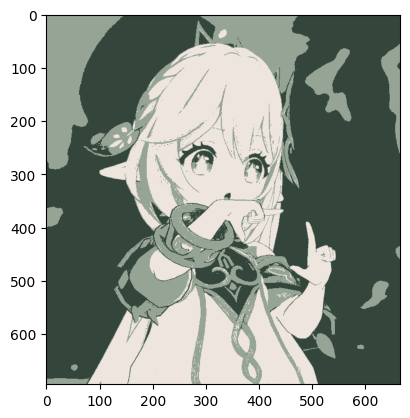

In [20]:
pixels, means = initialize_means(img_np,3)
means, index = k_means(pixels, means,3)
compress_img(means, index, img_np, 3)

Cluster = 5

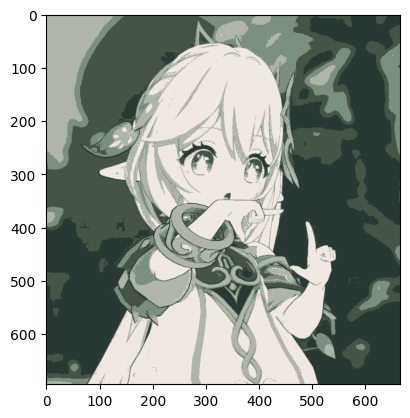

In [21]:
pixels, means = initialize_means(img_np,5)
means, index = k_means(pixels, means,5)
compress_img(means, index, img_np, 5)

Cluster = 7

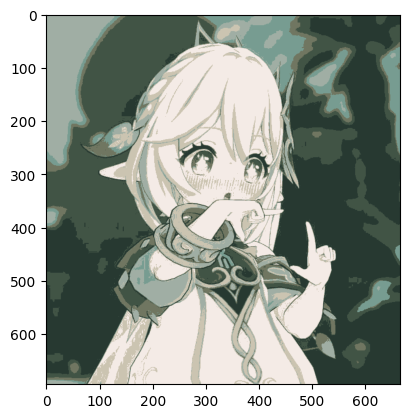

In [22]:
pixels, means = initialize_means(img_np,7)
means, index = k_means(pixels, means,7)
compress_img(means, index, img_np, 7)

Main function:

In [17]:
#image = input('Enter image file: ')
#img_np = np.array(image)
#img_np = np.float32(img_np)
#clusters = int(input('Enter number of clusters: '))
#t = []
#tracemalloc.start()
#t1 = perf_counter_ns()
#pixels, means = initialize_means(img_np,k)
#means, index = k_means(pixels, means,k)
#compress_img(means, index, img_np, k)
#t2 = perf_counter_ns()
#tracemalloc.stop()
#t.append((t2 - t1) / 10**6)
#print("Runtime: {runtime:.2f} ms".format(runtime = t[k]))
    